<a href="https://colab.research.google.com/github/vellamike/toy_snp_caller/blob/master/Toy_SNP_caller_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import random
import numpy as np
NUCLEOTIDES = "ACGT"

# Function to simulate multiple sequence alignments with errors and either no SNP or heterozygous SNP

In [8]:
def simulate_alignments(reference_length=200, num_alignments = 20000, 
                        coverage = 100, p_sequencing_error=0.15):
    alignments = []
    mutation_types = []
    snp_index = reference_length // 2
    
    for i in range(num_alignments):
        if (i % 400 == 0):
          print("Computing alignment ", i)
        reference = [random.choice(NUCLEOTIDES) for _ in range(reference_length)]
        reference_base_at_snp = reference[snp_index]
        snp_base = random.choice([i for i in NUCLEOTIDES if i != reference_base_at_snp])
        mutation_type=random.choice([0,1,2]) # 0 -> no SNP; 1 -> Homozygous SNP; 2 -> Heterozygous SNP
        mutation_types.append(mutation_type)
        
        alignment = [reference]#first read is always the reference
        for _ in range(coverage):
            new_read = [reference[i] if random.random() > p_sequencing_error else random.choice(NUCLEOTIDES) for i in range(reference_length)]
            
            if mutation_type == 1: #homozygous SNP
                new_read[snp_index] = snp_base
            if mutation_type == 2 and random.random() > 0.5: # heterozygous SNP
                new_read[snp_index] = snp_base

            if random.random() < p_sequencing_error: #Add errors to SNP region also
                new_read[snp_index] =  random.choice(NUCLEOTIDES)
            alignment.append(new_read)
        alignments.append(alignment)
    return alignments, mutation_types

In [9]:
# Compute 2000 alignments
alignments, mutation_types = simulate_alignments(num_alignments=2000)
alignments = np.array(alignments)

Computing alignment  0
Computing alignment  400
Computing alignment  800
Computing alignment  1200
Computing alignment  1600


# Visualise the alignments

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
transdict = {"A":0, "C": 1, "G":2, "T":3}
alignments_ints = np.vectorize(transdict.get)(alignments)
plt.rcParams['figure.dpi'] = 200

Mutation type:  Heterozygous SNP


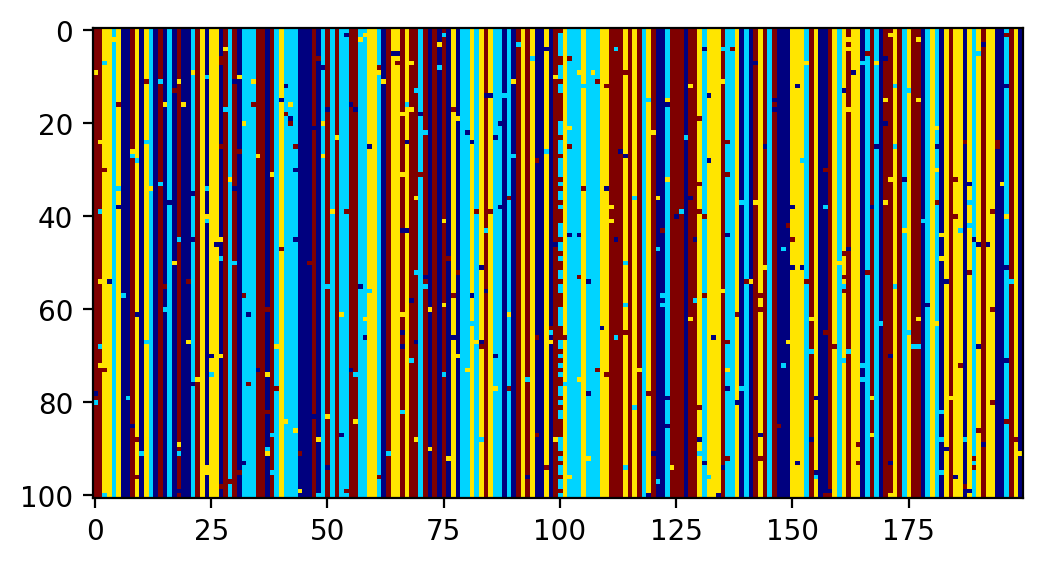

In [12]:
alignment_idx = 13
plt.imshow(alignments_ints[alignment_idx],cmap='jet')
mutation_type_names = {0: "No mutation",
                 1: "Homozygous SNP",
                 2: "Heterozygous SNP"}
print ("Mutation type: ", mutation_type_names[mutation_types[alignment_idx]])